In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
### Dataset description (rows, columns, variable types) and key variables
communes = pd.read_csv("Data/ofgl-base-communes.csv", delimiter=";", low_memory=False)
communes["type"] = "commune"
departements = pd.read_csv("Data/ofgl-base-departements.csv", delimiter=";", low_memory=False)
departements["type"] = "departement"
regions = pd.read_csv("Data/ofgl-base-regions.csv", delimiter=";", low_memory=False)
regions["type"] = "region"

##Communes : Missing Values/Duplicate/Retype

In [3]:
print('Missing values in departements:')
print(communes.isna().sum())

print('\nData types of departements:')
print(communes.dtypes)

print('\nDuplicate rows in departements:')
print(communes.duplicated().sum())

Missing values in departements:
Exercice                                       0
Outre-mer                                      0
Code Insee 2024 Région                         0
Nom 2024 Région                                0
Code Insee 2024 Département                    0
Nom 2024 Département                           0
Code Siren 2024 EPCI                         562
Nom 2024 EPCI                                562
Strate population 2024                         1
Commune rurale                                 1
Commune de montagne                            1
Commune touristique                            1
Tranche revenu par habitant                    1
Présence QPV                                   1
Code Insee 2024 Commune                        1
Nom 2024 Commune                               1
Catégorie                                      1
Code Siren Collectivité                        1
Code Insee Collectivité                        1
Siret Budget                         

###Too much None values:

In [4]:
communes = communes.drop(columns = "ordre_analyse1_section1")
communes = communes.drop(columns = "ordre_analyse1_section2")
communes = communes.drop(columns = "ordre_analyse1_section3")
communes = communes.drop(columns = "ordre_analyse2_section1")
communes = communes.drop(columns = "ordre_analyse2_section2")
communes = communes.drop(columns = "ordre_analyse2_section3")
communes = communes.drop(columns = "ordre_analyse3_section1")
communes = communes.drop(columns = "ordre_analyse3_section2")
communes = communes.drop(columns = "ordre_analyse3_section3")
communes = communes.drop(columns = "ordre_analyse4_section1")


###
Certaines communes insulaires (comme Île-de-Bréhat dans les Côtes-d’Armor ou Ouessant dans le Finistère) présentent des valeurs manquantes pour Code Siren 2024 EPCI. Cela reflète leur non-appartenance à un EPCI à fiscalité propre pour les exercices considérés, du fait de leur statut insulaire et administratif particulier.

Ces valeurs manquantes ont un sens réel, pas une erreur :

Elles indiquent l’absence d’appartenance à un EPCI (structure intercommunale).

C’est une information administrative pertinente, notamment pour l’analyse territoriale.

Supprimer ces lignes fausserait ton analyse :

Tu éliminerais certaines communes insulaires ou spécifiques, donc ta base ne représenterait plus fidèlement la France entière.

Cela biaiserait toute analyse géographique, budgétaire ou populationnelle.

In [5]:
communes["Nom 2024 EPCI"] = communes["Nom 2024 EPCI"].fillna("Aucun Nom 2024 EPCI")

###
Une seule ligne (Saint-Martin-de-Seignanx) présente des valeurs manquantes pour certaines colonnes budgétaires et populationnelles. Ces valeurs sont conservées car elles reflètent une situation réelle de budget annexe ou de compte comptable spécifique.

Concernant les autres valuers nulles :

Supprimer la colonne ou la ligne fausserait les résultats et les visualisations.

Même si certaines valeurs sont manquantes, la ligne contient toujours des informations utiles comme la commune, le département, le budget.

In [6]:
colonnes_a_remplir = [
    "Code Siren 2024 EPCI",
    "Montant en € par habitant",
    "Montant en millions",
    "Population totale",
    "Compte 2024 Disponible",
    "code_type_budget",
    "annee_join",
    "Population totale du dernier exercice"
]

for col in colonnes_a_remplir:
    communes.loc[communes[col].isna(), col] = 0


###Retype
We change the type of some columns

In [7]:
communes["Code Siren 2024 EPCI"] = communes["Code Siren 2024 EPCI"].astype(int)
communes["annee_join"] = communes["annee_join"].astype(int)
communes["Population totale"] = communes["Population totale"].astype(int)
communes["Population totale du dernier exercice"] = communes["Population totale du dernier exercice"].astype(int)
communes["Compte 2024 Disponible"] = communes["Compte 2024 Disponible"].astype(int)
communes["code_type_budget"] = communes["code_type_budget"].astype(int)
communes.dtypes

,0
Exercice,int64
Outre-mer,object
Code Insee 2024 Région,int64
Nom 2024 Région,object
Code Insee 2024 Département,object
Nom 2024 Département,object
Code Siren 2024 EPCI,int64
Nom 2024 EPCI,object
Strate population 2024,float64
Commune rurale,object


In [8]:
communes.duplicated().sum()

np.int64(0)

In [9]:
communes.isna().sum()

,0
Exercice,0
Outre-mer,0
Code Insee 2024 Région,0
Nom 2024 Région,0
Code Insee 2024 Département,0
Nom 2024 Département,0
Code Siren 2024 EPCI,0
Nom 2024 EPCI,0
Strate population 2024,1
Commune rurale,1


##Départements : Missing Values/Duplicate/Retype

In [10]:
print('Missing values in departements:')
print(departements.isna().sum())

print('\nData types of departements:')
print(departements.dtypes)

print('\nDuplicate rows in departements:')
print(departements.duplicated().sum())

Missing values in departements:
Exercice                                                  0
Outre-mer                                                 0
Code Insee 2024 Région                                    0
Nom 2024 Région                                           0
Strate population 2024                                    0
Rural / urbain                                            0
Code Insee 2024 Département                               0
Nom 2024 Département                                      0
Catégorie                                                 0
Code Siren Collectivité                                   0
Siret Budget                                              0
Libellé Budget                                            0
Type de budget                                            0
Nomenclature                                              0
Agrégat                                                   0
Montant                                                   0
Montant 

In [11]:
departements = departements.drop(columns = "ordre_analyse1_section1")
departements = departements.drop(columns = "ordre_analyse1_section2")
departements = departements.drop(columns = "ordre_analyse1_section3")
departements = departements.drop(columns = "ordre_analyse2_section1")
departements = departements.drop(columns = "ordre_analyse2_section2")
departements = departements.drop(columns = "ordre_analyse2_section3")
departements = departements.drop(columns = "ordre_analyse3_section1")
departements = departements.drop(columns = "ordre_analyse3_section2")
departements = departements.drop(columns = "ordre_analyse3_section3")
departements = departements.drop(columns = "ordre_analyse4_section1")

##Régions : Missing Values/Duplicate/Retype

In [12]:
print('Missing values in departements:')
print(regions.isna().sum())

print('\nData types of departements:')
print(regions.dtypes)

print('\nDuplicate rows in departements:')
print(regions.duplicated().sum())

Missing values in departements:
Exercice                                                 0
Outre-mer                                                0
CTU ou Collectivité de Corse                             0
Code Insee 2024 Région                                   0
Nom 2024 Région                                          0
Catégorie                                                0
Code Siren Collectivité                                  0
Siret Budget                                             0
Libellé Budget                                           0
Type de budget                                           0
Nomenclature                                             0
Agrégat                                                  0
Montant                                                  0
Montant en millions                                      0
Population totale                                        0
Montant en € par habitant                                0
code_type_budget        

In [13]:
regions = regions.drop(columns = "ordre_analyse1_section1")
regions = regions.drop(columns = "ordre_analyse1_section2")
regions = regions.drop(columns = "ordre_analyse1_section3")
regions = regions.drop(columns = "ordre_analyse2_section1")
regions = regions.drop(columns = "ordre_analyse2_section2")
regions = regions.drop(columns = "ordre_analyse2_section3")
regions = regions.drop(columns = "ordre_analyse3_section1")
regions = regions.drop(columns = "ordre_analyse3_section2")
regions = regions.drop(columns = "ordre_analyse3_section3")
regions = regions.drop(columns = "ordre_analyse4_section1")

##Descriptive statistics

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

###Communes

In [15]:
# Statistiques descriptives globales
communes.describe()

,Exercice,Code Insee 2024 Région,Code Siren 2024 EPCI,Strate population 2024,Tranche revenu par habitant,Code Siren Collectivité,Siret Budget,Montant,Montant en millions,Population totale,Montant en € par habitant,Compte 2024 Disponible,code_type_budget,annee_join,Population totale du dernier exercice
count,1.567183e+06,1.567183e+06,1.567183e+06,1.567182e+06,1.567182e+06,1.567182e+06,1.567182e+06,1.567182e+06,1.567183e+06,1.567183e+06,1.567183e+06,1.567183e+06,1.567183e+06,1.567183e+06,1.567183e+06
mean,2.017877e+03,5.360405e+01,2.130899e+08,2.873488e+00,1.585847e+00,2.142092e+08,2.142092e+13,3.899101e+05,3.899099e-01,3.643082e+03,1.935767e+02,9.990869e-01,1.834115e+00,2.017875e+03,3.704543e+03
std,3.289906e-01,2.421018e+01,2.073509e+07,1.764773e+00,7.983552e-01,3.554490e+06,3.554490e+11,1.120283e+07,1.120282e+01,4.429290e+04,6.127973e+02,3.020381e-02,9.861464e-01,1.645119e+00,4.303027e+04
min,2.017000e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000022e+08,2.000022e+13,-9.254930e+07,-9.254930e+01,0.000000e+00,-1.135839e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.018000e+03,2.800000e+01,2.000661e+08,2.000000e+00,1.000000e+00,2.123126e+08,2.123126e+13,0.000000e+00,0.000000e+00,2.580000e+02,0.000000e+00,1.000000e+00,1.000000e+00,2.018000e+03,2.590000e+02
50%,2.018000e+03,5.200000e+01,2.000699e+08,3.000000e+00,1.000000e+00,2.145019e+08,2.145019e+13,1.690500e+04,1.690500e-02,6.300000e+02,3.240578e+01,1.000000e+00,1.000000e+00,2.018000e+03,6.460000e+02
75%,2.018000e+03,7.600000e+01,2.417005e+08,3.000000e+00,2.000000e+00,2.167035e+08,2.167035e+13,1.113067e+05,1.113067e-01,1.681000e+03,1.793741e+02,1.000000e+00,3.000000e+00,2.018000e+03,1.759000e+03
max,2.018000e+03,9.400000e+01,2.497401e+08,1.000000e+01,5.000000e+00,2.197402e+08,2.197402e+13,6.772719e+09,6.772719e+03,2.243739e+06,1.830050e+05,1.000000e+00,3.000000e+00,2.018000e+03,2.149216e+06


In [16]:
communes.groupby("Type de budget")[["Montant en € par habitant"]].agg(['mean','sum','min','max'])

Montant en € par habitant                              \
                                      mean           sum           min   
Type de budget                                                           
Budget annexe                    48.537377  3.172432e+07  -6641.246654   
Budget principal                297.343440  2.716458e+08 -11358.388571   

                                 
                            max  
Type de budget                   
Budget annexe      64577.068417  
Budget principal  183004.962179

In [17]:
# Somme des budgets par commune
commune_budget = communes.groupby("Nom 2024 Commune")["Montant"].sum().reset_index()

# Top 5 communes avec le plus de budget
top5_plus = commune_budget.sort_values(by="Montant", ascending=False).head(5)
print("Top 5 communes avec le plus de budget :")
print(top5_plus)

# Top 5 communes avec le moins de budget
top5_moins = commune_budget.sort_values(by="Montant", ascending=True).head(5)
print("\nTop 5 communes avec le moins de budget :")
print(top5_moins)


Top 5 communes avec le plus de budget :
      Nom 2024 Commune       Montant
21074            Paris  3.727844e+10
17501        Marseille  9.982990e+09
20058             Nice  4.520326e+09
16750             Lyon  3.556458e+09
29478         Toulouse  3.178620e+09

Top 5 communes avec le moins de budget :
             Nom 2024 Commune   Montant
2170                   Baulny  39435.78
11479            Gussainville  43262.65
32536                Épécamps  47604.55
8045                    Cunel  62011.52
8040   Cumières-le-Mort-Homme  65395.38


###Departments



In [24]:
# Statistiques descriptives globales
departements.describe()

,Exercice,Code Insee 2024 Région,Strate population 2024,Code Siren Collectivité,Siret Budget,Montant,Montant en millions,Population totale,Montant en € par habitant,code_type_budget,annee_join,Population totale du dernier exercice,Population municipale,Montant en € par habitant (population municipale)
count,290281.000000,290281.000000,290281.000000,2.902810e+05,2.902810e+05,2.902810e+05,290281.000000,2.902810e+05,290281.000000,290281.000000,290281.000000,2.902810e+05,2.902810e+05,290281.000000
mean,2017.838646,53.994891,1.925469,2.243098e+08,2.243098e+13,4.166878e+07,41.668777,6.887983e+05,62.245852,2.447487,2017.838646,7.059528e+05,6.749670e+05,63.796702
std,3.735823,27.155176,1.420298,4.153710e+06,4.153710e+11,1.994701e+08,199.470103,5.120655e+05,210.367722,0.894292,3.735823,5.342365e+05,5.066072e+05,215.451952
min,2012.000000,1.000000,0.000000,2.000470e+08,2.000470e+13,-1.177254e+09,-1177.253721,8.008100e+04,-547.759612,1.000000,2012.000000,8.022700e+04,7.630900e+04,-551.895200
25%,2015.000000,28.000000,1.000000,2.221000e+08,2.221000e+13,0.000000e+00,0.000000,3.166080e+05,0.000000,1.000000,2015.000000,3.171390e+05,3.071100e+05,0.000000
50%,2018.000000,52.000000,2.000000,2.244000e+08,2.244000e+13,1.002355e+05,0.100236,5.436480e+05,0.190207,3.000000,2018.000000,5.452830e+05,5.297610e+05,0.194050
75%,2021.000000,76.000000,3.000000,2.273000e+08,2.273000e+13,6.799062e+06,6.799062,9.254420e+05,12.596559,3.000000,2021.000000,9.369590e+05,8.939140e+05,12.914658
max,2024.000000,94.000000,4.000000,2.298500e+08,2.298500e+13,1.061416e+10,10614.157974,2.641207e+06,4938.618535,3.000000,2024.000000,2.636884e+06,2.611293e+06,4975.905133


In [31]:
departements.groupby("Exercice")[["Montant en € par habitant"]].agg(['mean','sum','min','max'])

Montant en € par habitant                                       
                              mean           sum         min          max
Exercice                                                                 
2012                     55.202992  1.312230e+06 -167.582054  1792.758943
2013                     55.822550  1.311551e+06 -133.302952  1795.293598
2014                     57.504478  1.335944e+06 -116.146037  1798.980420
2015                     58.286991  1.369161e+06 -170.307602  1921.024260
2016                     58.000520  1.340218e+06 -256.646472  1925.154021
2017                     58.362103  1.330306e+06 -237.253782  1957.078623
2018                     59.948837  1.288001e+06 -232.287695  1959.845937
2019                     61.289441  1.365406e+06 -249.773659  3675.206720
2020                     62.814237  1.386750e+06 -481.136205  3697.032601
2021                     68.258337  1.468851e+06 -322.269253  3818.208823
2022                     71.492506  1.522504e+06 -315.878958  4228.320682
2023                     72.182014  1.510481e+06 -295.025844  4527.827895
2024                     73.393134  1.527385e+06 -547.759612  4938.618535

In [35]:
departements.groupby("Nom 2024 Département")[["Montant en € par habitant"]].agg(['mean','sum','min','max'])

Montant en € par habitant                             \
                                             mean            sum         min   
Nom 2024 Département                                                           
Ain                                     66.492989  157322.412178 -191.403371   
Aisne                                   49.710045  177514.570298  -56.085186   
Allier                                  79.414551  198139.305848  -88.582560   
Alpes-Maritimes                         50.492710  189600.125333  -66.995417   
Alpes-de-Haute-Provence                 84.752292  219254.179835 -101.622852   
...                                           ...            ...         ...   
Vendée                                  51.162118  159830.457247  -70.446995   
Vienne                                  42.993356  152970.362060  -69.108006   
Vosges                                  56.009349  186903.198827  -67.562969   
Yonne                                   82.979374  176580.106830  -88.498531   
Yvelines                                42.001488  137386.867930 -200.701860   

                                      
                                 max  
Nom 2024 Département                  
Ain                      1075.301913  
Aisne                    1321.742778  
Allier                   1530.336779  
Alpes-Maritimes          1378.593598  
Alpes-de-Haute-Provence  1676.089020  
...                              ...  
Vendée                   1097.382748  
Vienne                   1154.532500  
Vosges                   1394.093332  
Yonne                    1381.970295  
Yvelines                 1106.953058  

[101 rows x 4 columns]

In [59]:
# Somme des budgets par departements
departements_budget = departements.groupby("Nom 2024 Département")["Montant en € par habitant"].mean().reset_index()

# Top 5 departements avec la plus haute dépense par habitant
top5_plus = departements_budget.sort_values(by="Montant en € par habitant", ascending=False).head(5)
print("Top 5 departements avec le plus de budget :")
print(top5_plus)

# Top 5 departements avec la plus basse dépense par habitant
top5_moins = departements_budget.sort_values(by="Montant en € par habitant", ascending=True).head(5)
print("\nTop 5 departements avec le moins de budget :")
print(top5_moins)

Top 5 departements avec le plus de budget :
   Nom 2024 Département  Montant en € par habitant
76                Paris              360364.494361
34           Guadeloupe              266776.412897
60               Lozère              258572.242741
43         Hautes-Alpes              255287.727236
71    Métropole de Lyon              252199.827671

Top 5 departements avec le moins de budget :
   Nom 2024 Département  Montant en € par habitant
35               Guyane               60885.161917
64           Martinique               74379.014892
36          Haute-Corse               97539.688321
19         Corse-du-Sud              116026.221742
63                Marne              128077.930541


###Régions

In [53]:
# Statistiques descriptives globales
regions.describe()

,Exercice,Code Insee 2024 Région,Code Siren Collectivité,Siret Budget,Montant,Montant en millions,Population totale,Montant en € par habitant,code_type_budget,annee_join,Population municipale,Montant en € par habitant (population municipale)
count,22933.000000,22933.000000,2.293300e+04,2.293300e+04,2.293300e+04,22933.000000,2.293300e+04,22933.000000,22933.000000,22933.000000,2.293300e+04,22933.000000
mean,2018.004273,40.810797,2.204673e+08,2.204673e+13,2.342150e+08,234.215004,2.946629e+06,108.811122,1.794139,2018.004273,2.886665e+06,110.738400
std,3.725361,33.851388,1.815689e+07,1.815689e+12,5.916938e+08,591.693803,2.775629e+06,308.052993,0.978603,3.725361,2.728323e+06,312.625484
min,2012.000000,1.000000,2.000523e+08,2.000523e+13,-2.111916e+09,-2111.915893,2.264260e+05,-370.259890,1.000000,2012.000000,2.244690e+05,-376.390648
25%,2015.000000,4.000000,2.000538e+08,2.000538e+13,3.587400e+03,0.003587,4.099050e+05,0.001236,1.000000,2015.000000,4.033140e+05,0.001262
50%,2018.000000,32.000000,2.314000e+08,2.314000e+13,1.637278e+07,16.372779,1.962150e+06,9.096901,1.000000,2018.000000,1.914844e+06,9.277787
75%,2021.000000,75.000000,2.376000e+08,2.376000e+13,1.690799e+08,169.079942,5.103573e+06,81.011064,3.000000,2021.000000,5.021928e+06,82.868988
max,2024.000000,94.000000,2.397400e+08,2.397400e+13,6.913281e+09,6913.281364,1.242798e+07,4272.553535,3.000000,2024.000000,1.231728e+07,4337.788917


In [56]:
regions.groupby("Type de budget")[["Montant en € par habitant"]].agg(['mean','sum','min','max'])

Montant en € par habitant                            \
                                      mean           sum         min   
Type de budget                                                         
Budget annexe                     5.787026  5.269666e+04 -164.010942   
Budget principal                176.659348  2.442669e+06 -370.259890   

                               
                          max  
Type de budget                 
Budget annexe      686.919445  
Budget principal  4272.553535

In [57]:
regions.groupby("Exercice")[["Montant en € par habitant"]].agg(['mean','sum','min','max'])

Montant en € par habitant                                        
                              mean            sum         min          max
Exercice                                                                  
2012                     95.538357  158975.826684 -116.980709  1971.271274
2013                     93.642698  163125.580112 -173.475992  2019.328366
2014                     92.217118  163777.601352 -206.798602  2015.099188
2015                     86.385111  173806.842934 -294.241788  2058.644432
2016                    100.601349  165288.016596 -370.259890  3129.527286
2017                    102.612714  171363.232894 -171.849187  2799.213551
2018                    105.964921  196141.069337 -211.551372  3506.136804
2019                    106.793903  198316.277794  -57.270608  3679.406974
2020                    115.790724  200665.325266 -321.425266  3626.608629
2021                    127.153662  213363.845618 -206.955171  3790.408764
2022                    124.493310  218859.239026 -221.155747  4272.553535
2023                    128.753186  231111.968339 -164.010942  4181.176633
2024                    137.155439  240570.640573 -234.683349  4182.513056

In [60]:
# Somme des budgets par departements
regions_budget = regions.groupby("Nom 2024 Région")["Montant"].sum().reset_index()

# Top 5 régions avec le plus haute budget
top5_plus = regions_budget.sort_values(by="Montant", ascending=False).head(5)
print("Top 5 departements avec le plus de budget :")
print(top5_plus)

# Top 5 régions avec le plus bas budget
top5_moins = regions_budget.sort_values(by="Montant", ascending=True).head(5)
print("\nTop 5 departements avec le moins de budget :")
print(top5_moins)

Top 5 departements avec le plus de budget :
         Nom 2024 Région       Montant
16         Île-de-France  8.549318e+11
0   Auvergne-Rhône-Alpes  5.604270e+11
8        Hauts-de-France  5.016751e+11
13             Occitanie  4.532105e+11
12    Nouvelle-Aquitaine  4.433532e+11

Top 5 departements avec le moins de budget :
   Nom 2024 Région       Montant
6       Guadeloupe  6.852735e+10
7           Guyane  6.928364e+10
10      Martinique  1.391359e+11
4            Corse  1.520540e+11
9       La Réunion  1.579302e+11


##Visualize Distribution

###Communes

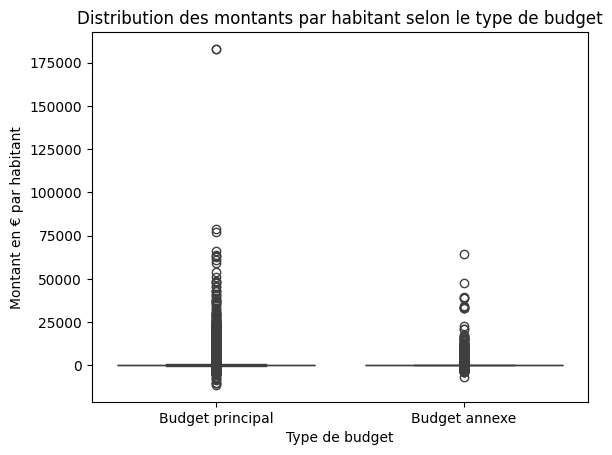

In [40]:
sns.boxplot(data=communes, x="Type de budget", y="Montant en € par habitant")
plt.ylabel("Montant en € par habitant")
plt.title("Distribution des montants par habitant selon le type de budget")
plt.show()

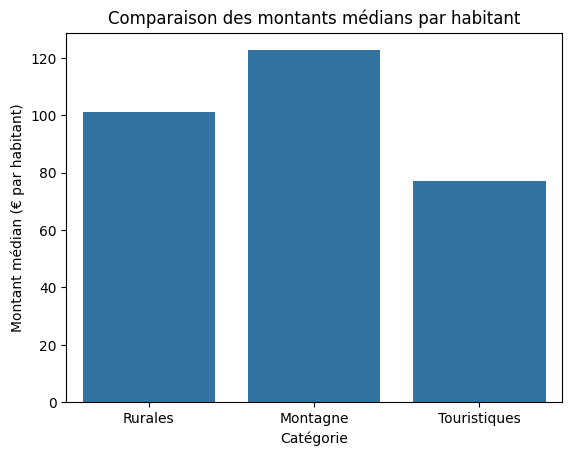

In [19]:
df_clean = communes[communes["Montant en € par habitant"] > 0]


df_rurales = df_clean[df_clean["Commune rurale"]=="Oui"]
df_montagne = df_clean[df_clean["Commune de montagne"]=="Oui"]
df_touristique = df_clean[df_clean["Commune touristique"]=="Oui"]

med_rurales = df_rurales["Montant en € par habitant"].median()
med_montagne = df_montagne["Montant en € par habitant"].median()
med_touristique = df_touristique["Montant en € par habitant"].median()


df_med = pd.DataFrame({
    "Catégorie": ["Rurales", "Montagne", "Touristiques"],
    "Médiane par habitant": [med_rurales, med_montagne, med_touristique]
})

sns.barplot(data=df_med, x="Catégorie", y="Médiane par habitant")

plt.ylabel("Montant médian (€ par habitant)")
plt.title("Comparaison des montants médians par habitant")
plt.show()

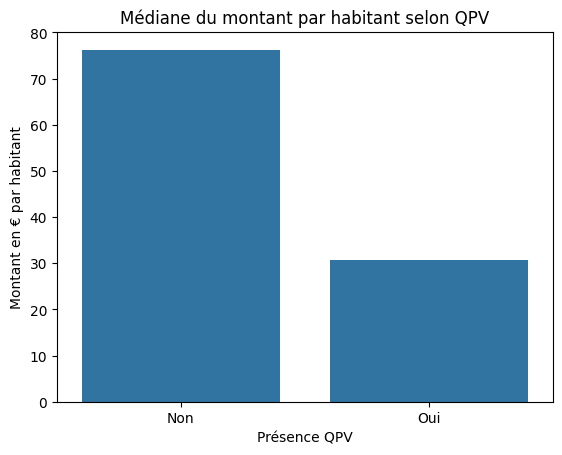

In [20]:
df_clean = communes[communes["Montant en € par habitant"] != 0]
medians_qpv = df_clean.groupby("Présence QPV")["Montant en € par habitant"].median().reset_index()

sns.barplot(data=medians_qpv, x="Présence QPV", y="Montant en € par habitant")
plt.title("Médiane du montant par habitant selon QPV")
plt.show()

In [21]:
communes_grouped = df_clean.groupby("Nom 2024 Commune")["Montant en € par habitant"].median().reset_index()
communes_grouped["Montant en € par habitant"].describe()

,Montant en € par habitant
count,32680.000000
mean,111.943214
std,130.986385
min,0.200194
25%,52.565765
50%,87.204594
75%,134.101193
max,7103.548500


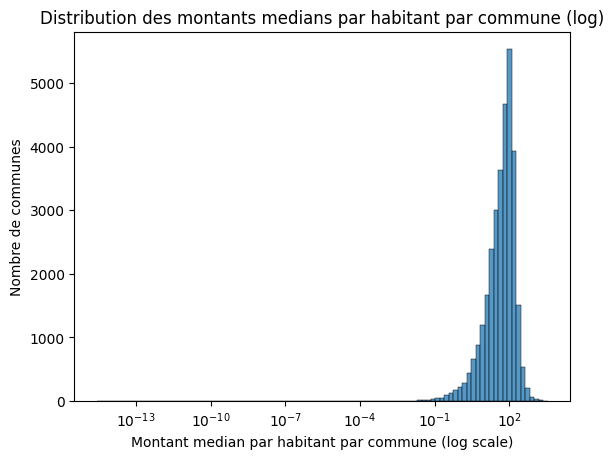

In [22]:
communes_grouped = communes.groupby("Nom 2024 Commune")["Montant en € par habitant"].median().reset_index()

sns.histplot(communes_grouped["Montant en € par habitant"], bins=100, log_scale=True)
plt.xlabel("Montant median par habitant par commune (log scale)")
plt.ylabel("Nombre de communes")
plt.title("Distribution des montants medians par habitant par commune (log)")
plt.show()

###Departement

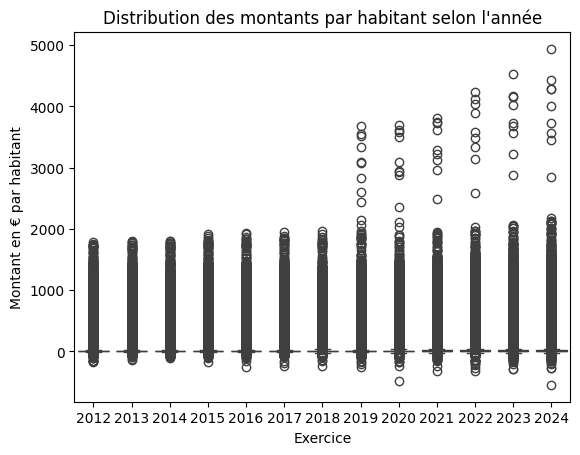

In [38]:
sns.boxplot(data=departements, x="Exercice", y="Montant en € par habitant")
plt.ylabel("Montant en € par habitant")
plt.title("Distribution des montants par habitant selon l'année")
plt.show()

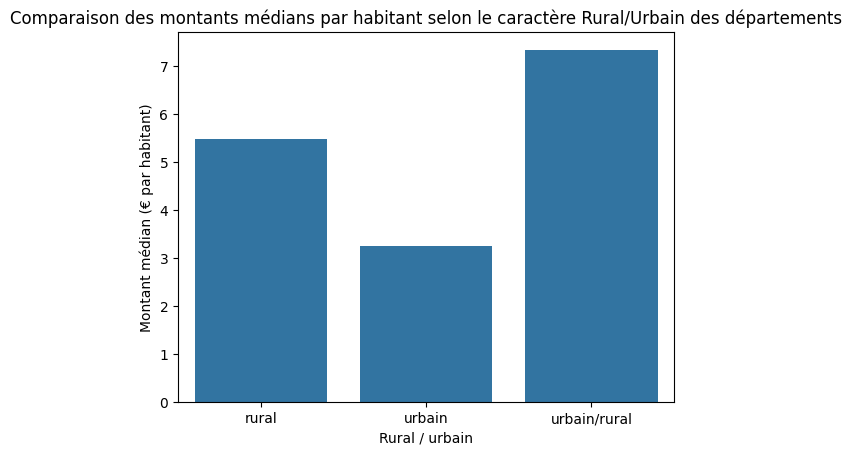

In [41]:
df_clean_departements = departements[departements["Montant en € par habitant"] > 0]

medians_rural_urbain = df_clean_departements.groupby("Rural / urbain")["Montant en € par habitant"].median().reset_index()

sns.barplot(data=medians_rural_urbain, x="Rural / urbain", y="Montant en € par habitant")
plt.ylabel("Montant médian (€ par habitant)")
plt.title("Comparaison des montants médians par habitant selon le caractère Rural/Urbain des départements")
plt.show()

In [42]:
dep_grouped = df_clean_departements.groupby("Nom 2024 Département")["Montant en € par habitant"].median().reset_index()
dep_grouped["Montant en € par habitant"].describe()

,Montant en € par habitant
count,101.000000
mean,11.935109
std,16.376860
min,0.640046
25%,2.674196
50%,6.272573
75%,13.167397
max,104.894923


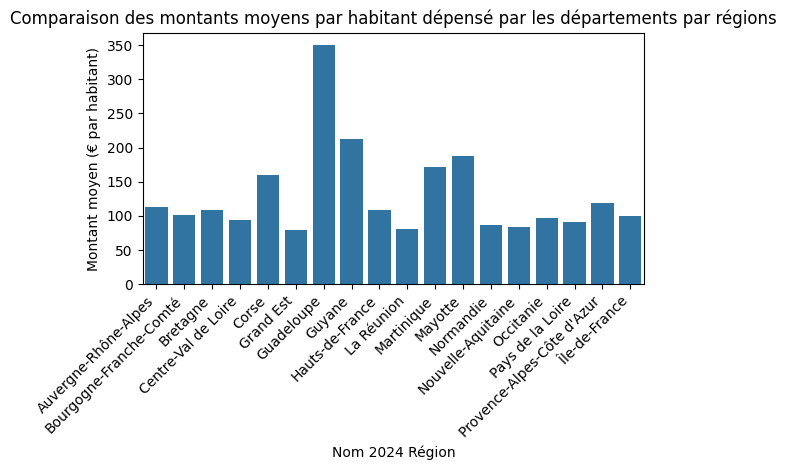

In [67]:
df_clean_departements = departements[departements["Montant en € par habitant"] > 0]

meanreg = df_clean_departements.groupby("Nom 2024 Région")["Montant en € par habitant"].mean().reset_index()

sns.barplot(data=meanreg, x="Nom 2024 Région", y="Montant en € par habitant")
plt.ylabel("Montant moyen (€ par habitant)")
plt.title("Comparaison des montants moyens par habitant dépensé par les départements par régions")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

###Régions

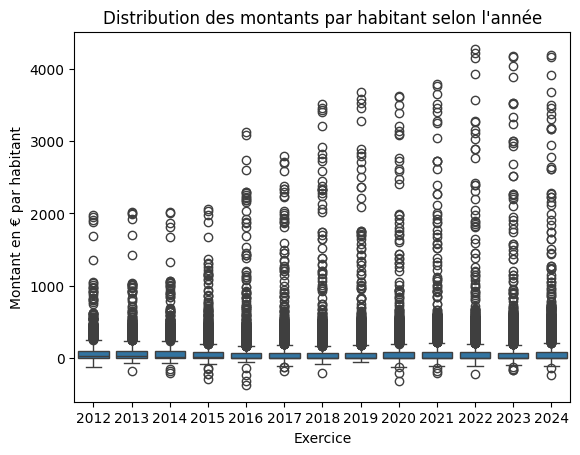

In [61]:
sns.boxplot(data=regions, x="Exercice", y="Montant en € par habitant")
plt.ylabel("Montant en € par habitant")
plt.title("Distribution des montants par habitant selon l'année")
plt.show()

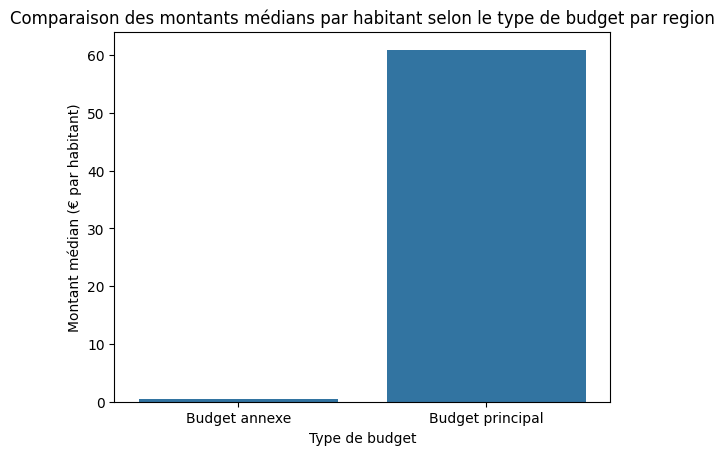

In [65]:
df_clean_regions = regions[regions["Montant en € par habitant"] > 0]

medians_budget = df_clean_regions.groupby("Type de budget")["Montant en € par habitant"].median().reset_index()

sns.barplot(data=medians_budget, x="Type de budget", y="Montant en € par habitant")
plt.ylabel("Montant médian (€ par habitant)")
plt.title("Comparaison des montants médians par habitant selon le type de budget par region")
plt.show()

In [66]:
reg_grouped = df_clean_regions.groupby("Nom 2024 Région")["Montant en € par habitant"].median().reset_index()
reg_grouped["Montant en € par habitant"].describe()

,Montant en € par habitant
count,17.000000
mean,42.251056
std,25.082703
min,4.979389
25%,26.522428
50%,44.592070
75%,47.411798
max,117.451806


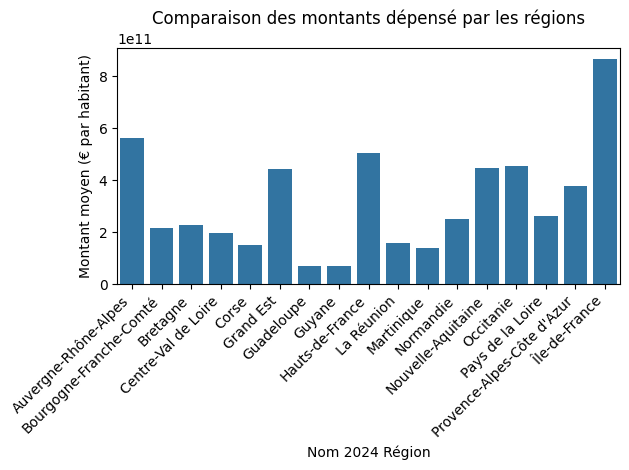

In [69]:
df_clean_region = regions[regions["Montant en € par habitant"] > 0]

sumreg = df_clean_regions.groupby("Nom 2024 Région")["Montant"].sum().reset_index()

sns.barplot(data=sumreg, x="Nom 2024 Région", y="Montant")
plt.ylabel("Montant moyen (€ par habitant)")
plt.title("Comparaison des montants dépensé par les régions")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##Outliers

###Communes

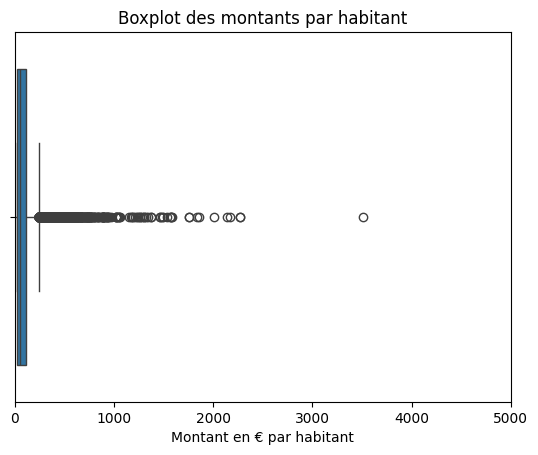

In [49]:
sns.boxplot(x=communes_grouped["Montant en € par habitant"])
plt.xlabel("Montant en € par habitant")
plt.title("Boxplot des montants par habitant")
plt.xlim(0, 5000)
plt.show()

###Departement

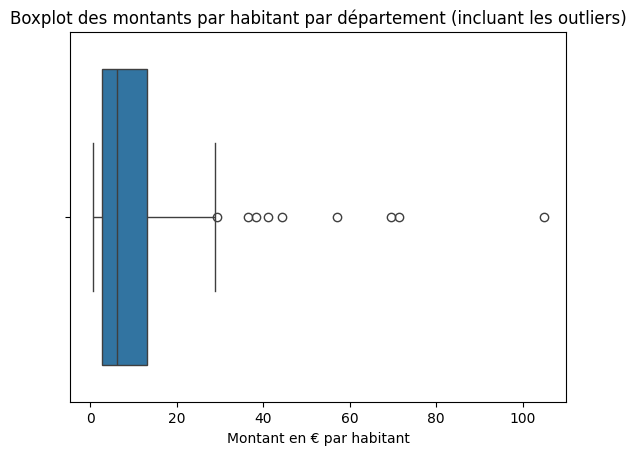

In [50]:
sns.boxplot(x=dep_grouped["Montant en € par habitant"])
plt.xlabel("Montant en € par habitant")
plt.title("Boxplot des montants par habitant par département (incluant les outliers)")
plt.show()

###Régions

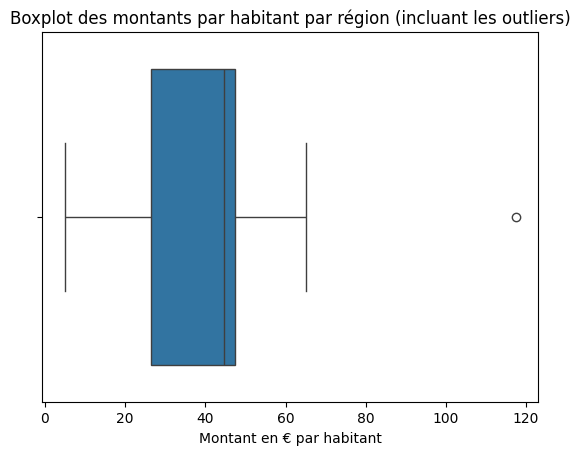

In [70]:
sns.boxplot(x=reg_grouped["Montant en € par habitant"])
plt.xlabel("Montant en € par habitant")
plt.title("Boxplot des montants par habitant par région (incluant les outliers)")
plt.show()

##Correlation matrix

##Communes

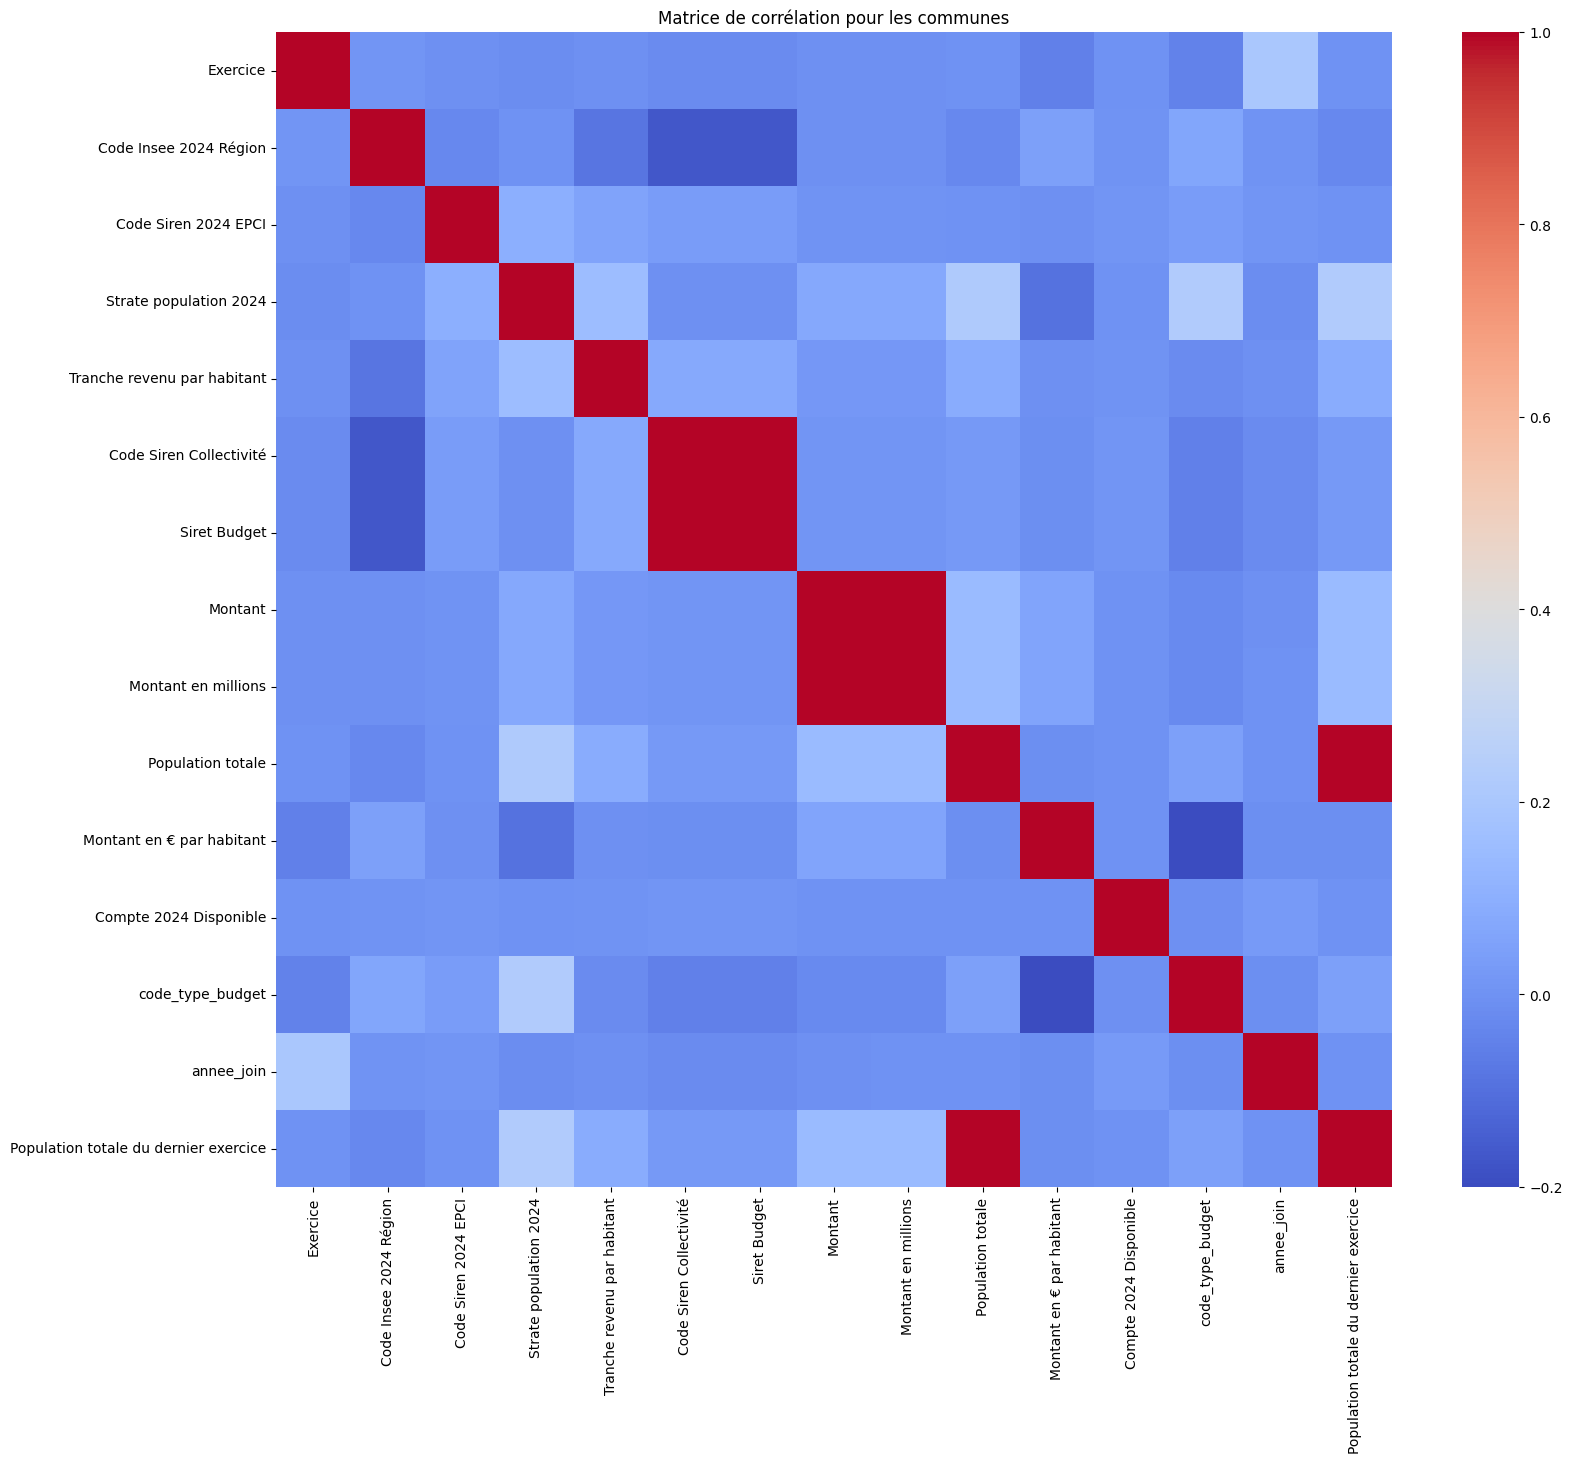

In [71]:
# Select only numerical columns for correlation matrix
communes_numeric = communes.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = communes_numeric.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation pour les communes')
plt.show()

From the heatmap, we can observe several strong correlations:

Very Strong Positive Correlations (close to 1):

Montant, Montant en millions, Population totale, Population totale du dernier exercice: These variables are all highly correlated with each other. This is intuitive, as a commune with a larger total budget (Montant) will naturally have a larger budget when expressed in millions, and typically a higher population. Similarly, current and last year's population figures are very similar.
Code Siren Collectivité and Siret Budget: These are also highly correlated, which is expected as they are both identification numbers for the same collective entity or its budget.
Exercice and annee_join: These are almost perfectly correlated, suggesting they represent the same or a very similar year of record.
Other Notable Correlations:

Montant en € par habitant shows some interesting patterns. While not as directly correlated with total population or total montant, it might show stronger correlations with other specific variables, such as 'Strate population 2024' or 'Tranche revenu par habitant', or even some negative correlations, indicating that larger populations don't always mean higher spending per capita.

##Departements

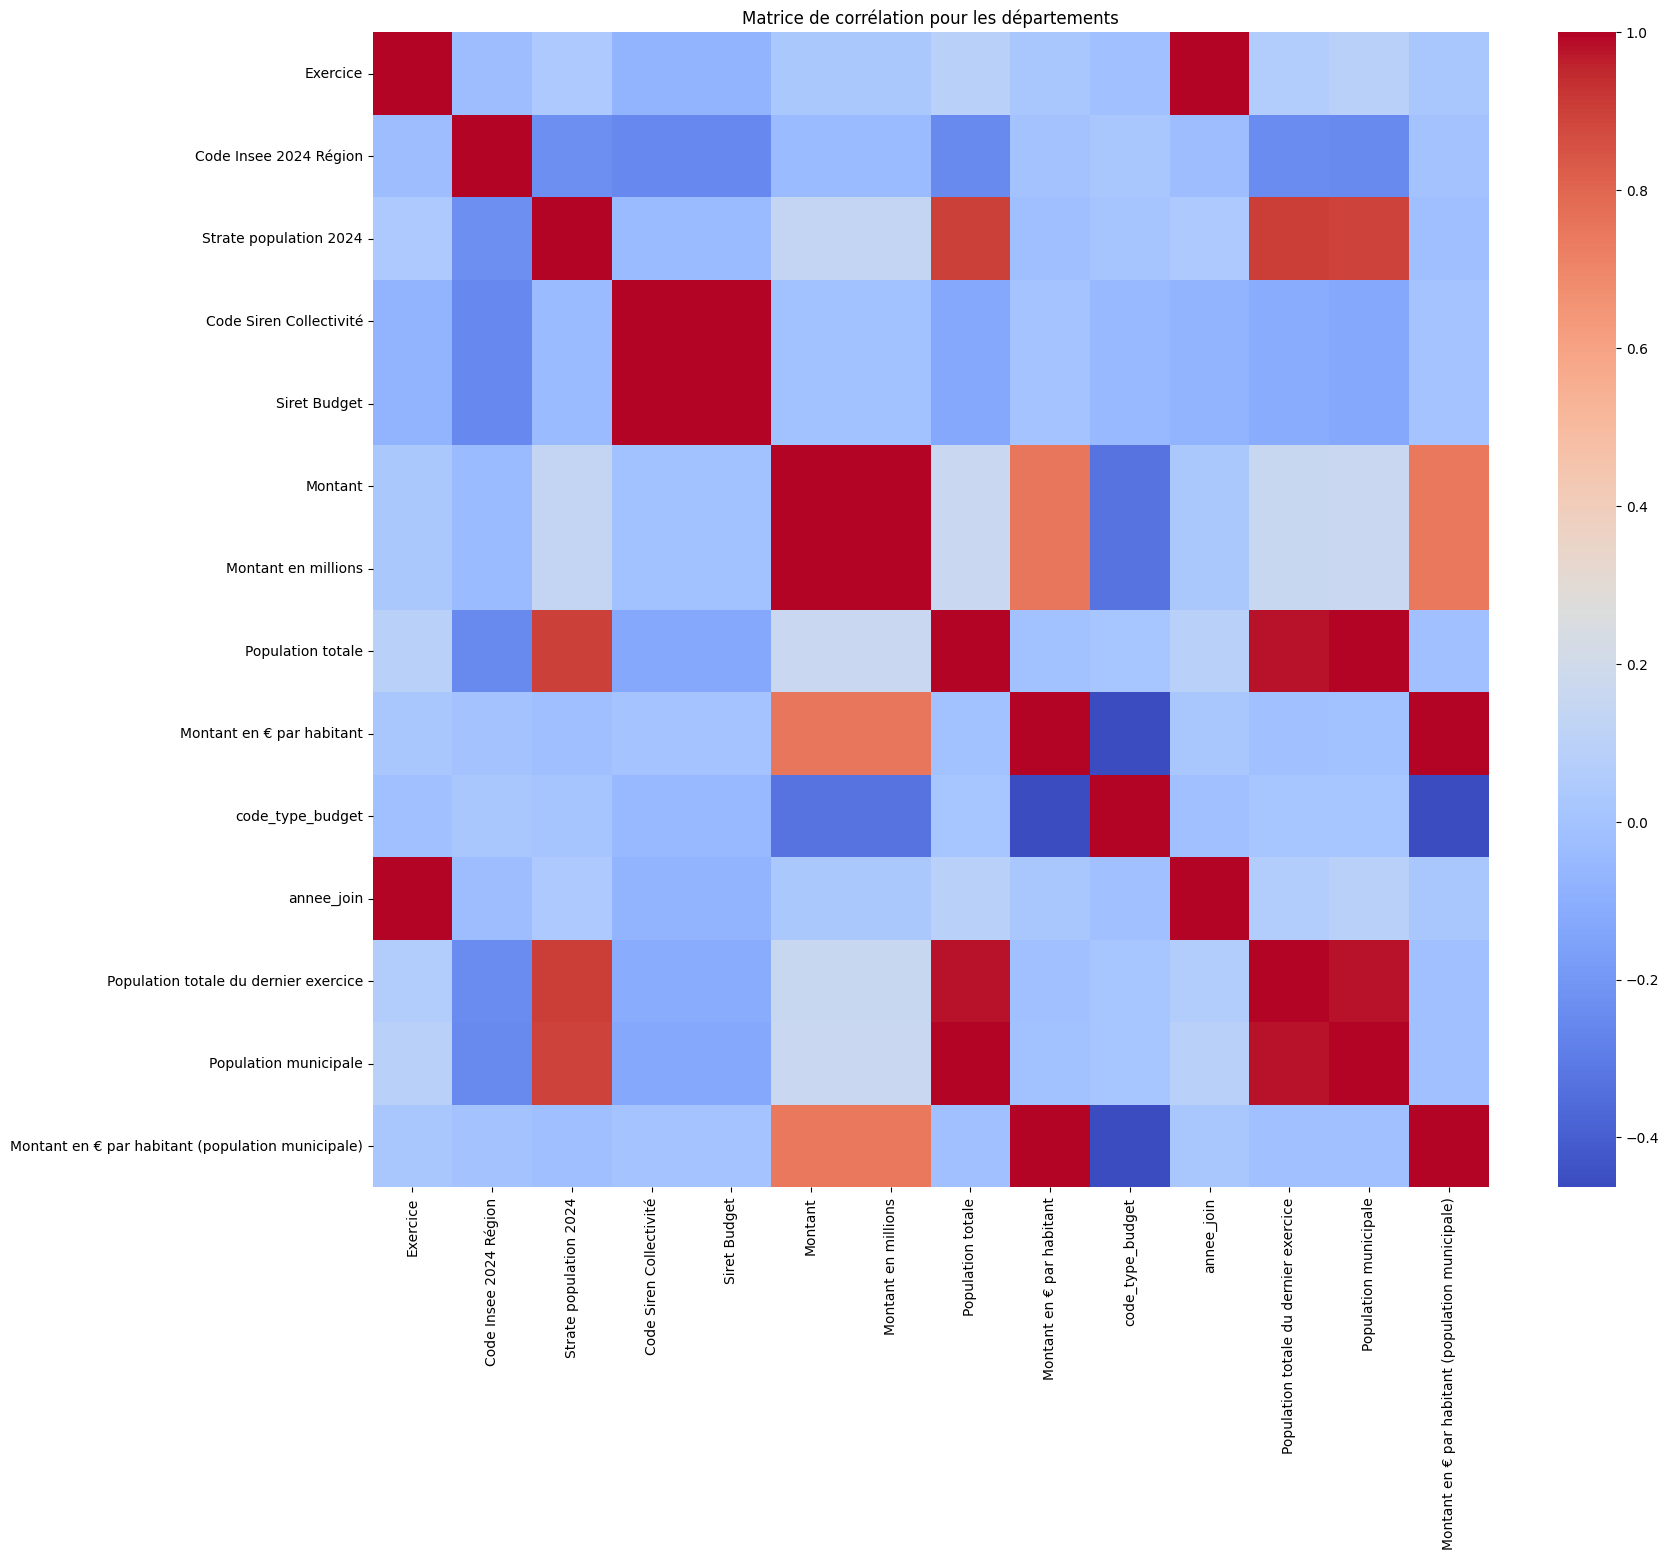

In [72]:
# Select only numerical columns for correlation matrix
departements_numeric = departements.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix_departements = departements_numeric.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix_departements, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation pour les départements')
plt.show()

From the heatmap, we can observe several strong correlations, similar to the communes dataset:

Very Strong Positive Correlations (close to 1):

Montant, Montant en millions, Population totale, Population totale du dernier exercice, Population municipale: These financial and demographic variables are highly correlated with each other. This is expected as larger departments generally have higher overall budgets and larger populations, and different population metrics are closely related.
Code Siren Collectivité and Siret Budget: As with communes, these identification numbers for the collecting entity and its budget are highly correlated.
Montant en € par habitant and Montant en € par habitant (population municipale): These two metrics are also very highly correlated, as they represent spending per capita, just using slightly different population bases (total vs. municipal).
Other Notable Correlations:

Exercice and annee_join: Again, these show a very strong positive correlation, indicating they represent the same or similar year information.
Strate population 2024 often shows some correlation with population figures, as it's a classification based on population size.

###Régions

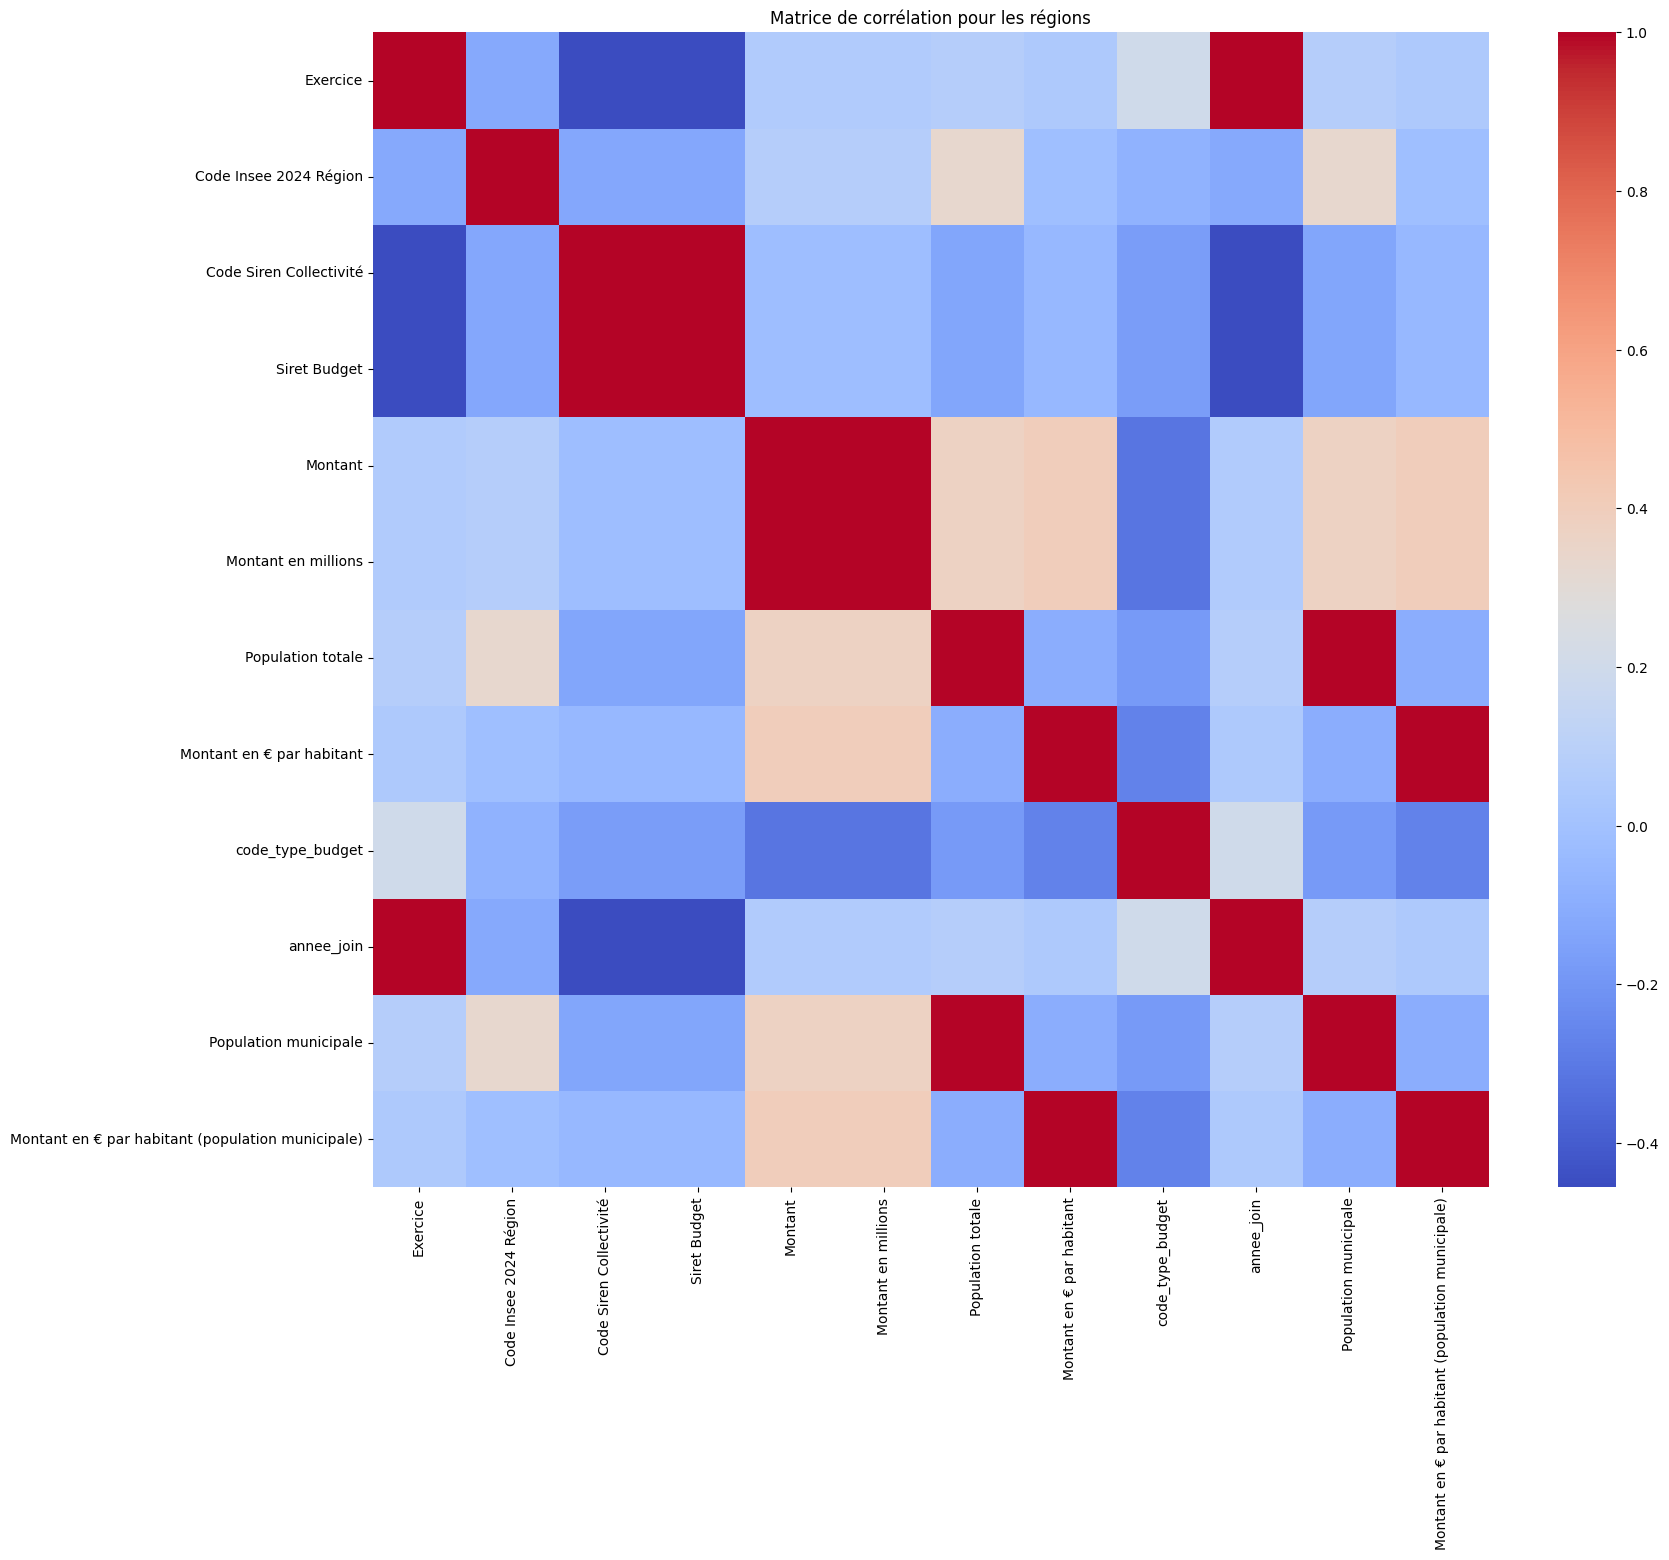

In [73]:
# Select only numerical columns for correlation matrix
regions_numeric = regions.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix_regions = regions_numeric.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix_regions, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation pour les régions')
plt.show()

From the heatmap, we can observe several strong correlations, echoing patterns seen in the communes and departments datasets:

Very Strong Positive Correlations (close to 1):

Montant, Montant en millions, Population totale, and Population municipale: These are all highly correlated. This is expected, as regions with larger populations tend to have larger overall budgets, and total population figures are closely related to municipal population figures.
Code Siren Collectivité and Siret Budget: These identification numbers for the collecting entity and its budget are, as expected, highly correlated.
Montant en € par habitant and Montant en € par habitant (population municipale): These two metrics are extremely highly correlated, indicating that spending per capita is very similar whether calculated using total population or municipal population.
Other Notable Correlations:

Exercice and annee_join: These variables show a strong positive correlation, confirming they both represent the year of the data record.
Code Insee 2024 Région: This administrative code shows some correlation with other variables, reflecting geographical groupings that might influence other metrics.